In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset_35_dermatology.csv")

In [3]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.shape

(366, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [6]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [7]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

# EDA

In [10]:
#Target class

In [11]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [12]:
#Target class is imbalanced

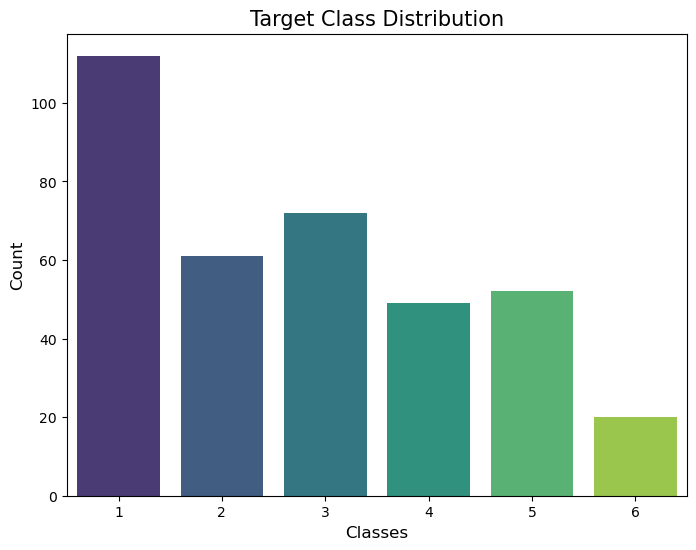

In [13]:
# Bar plot of target classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="class", palette="viridis")
plt.title("Target Class Distribution", fontsize=15)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

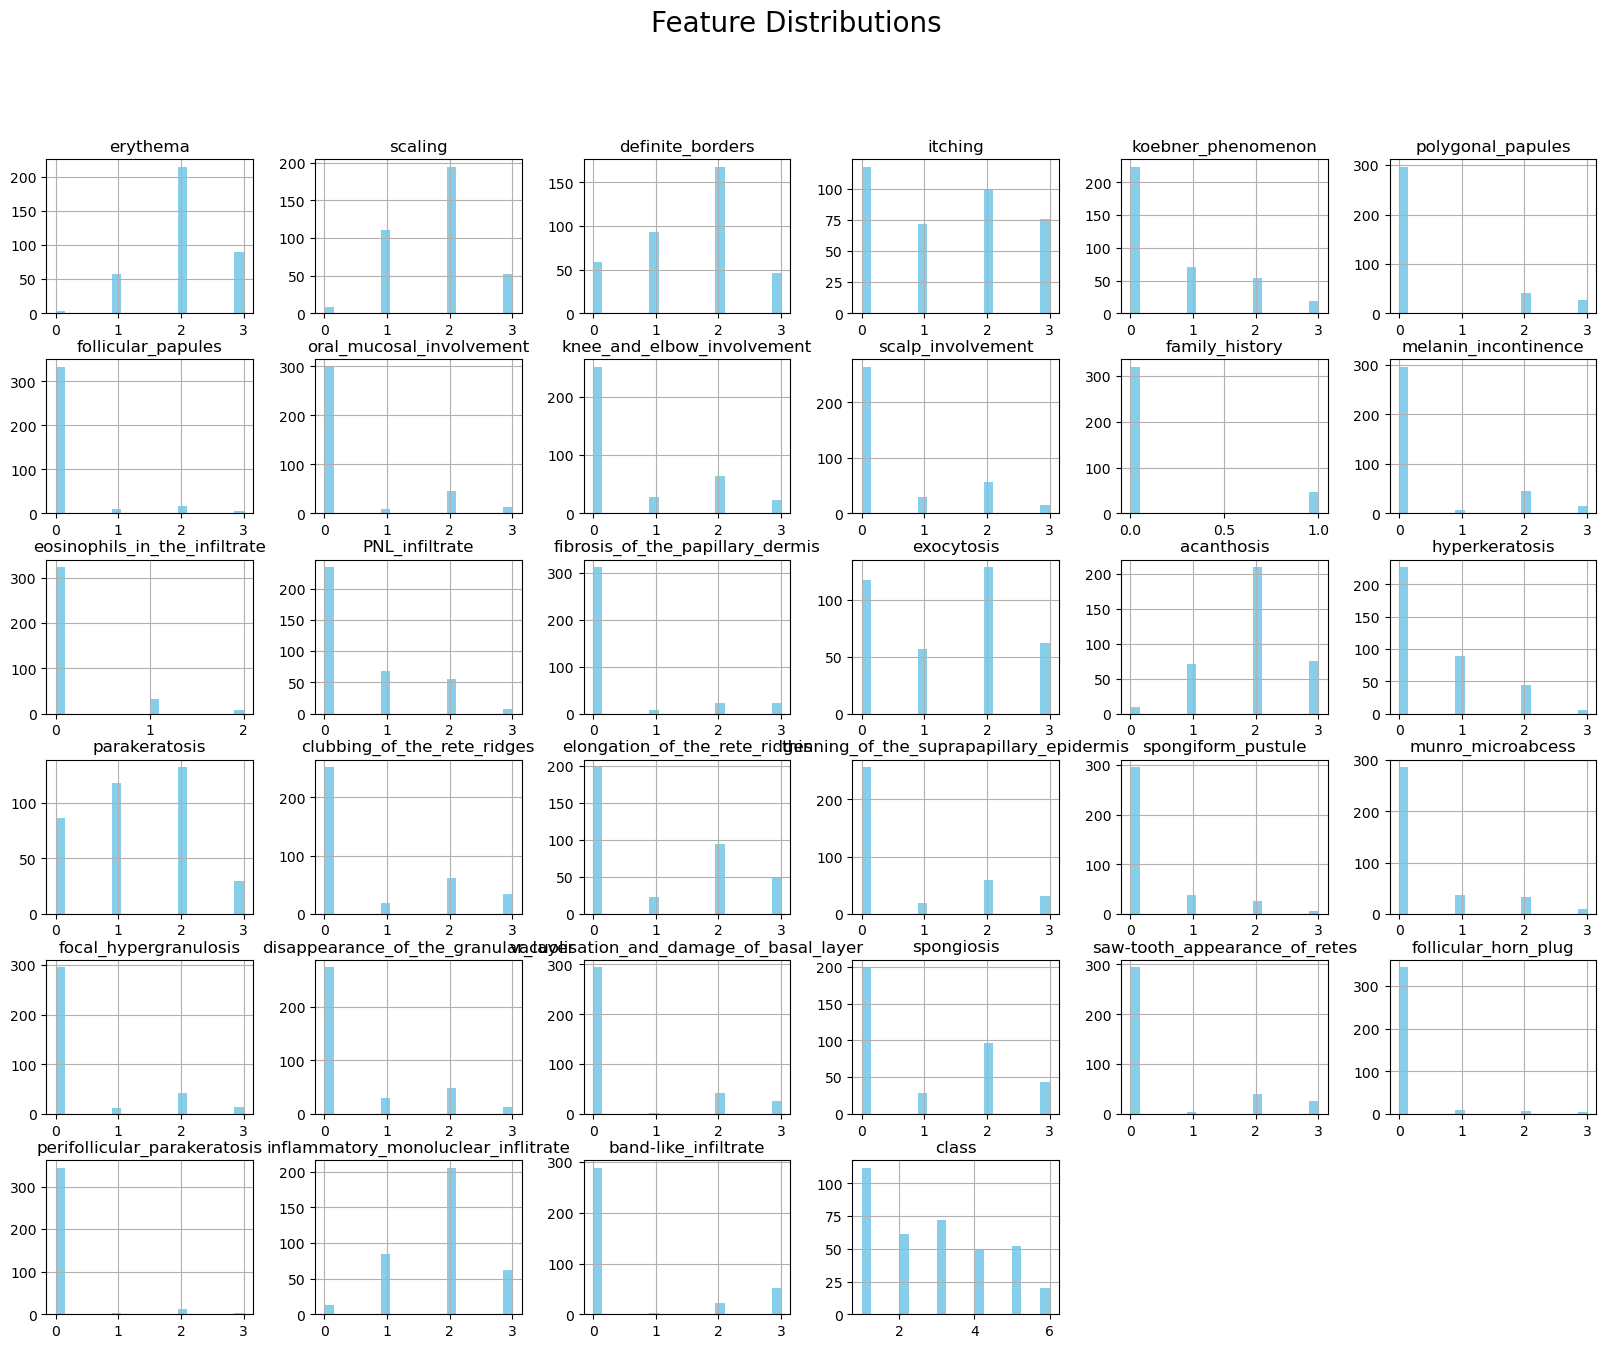

In [14]:
# Plot histograms for features
df.hist(bins=20, figsize=(20, 15), color='skyblue')
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

In [15]:
# Replace "?" with nan
df.replace("?", np.nan, inplace=True)

In [16]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors = "coerce")

In [17]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                           erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
PNL_infiltrate                            0.224095  0.282486   
fibrosis_of_the_pap

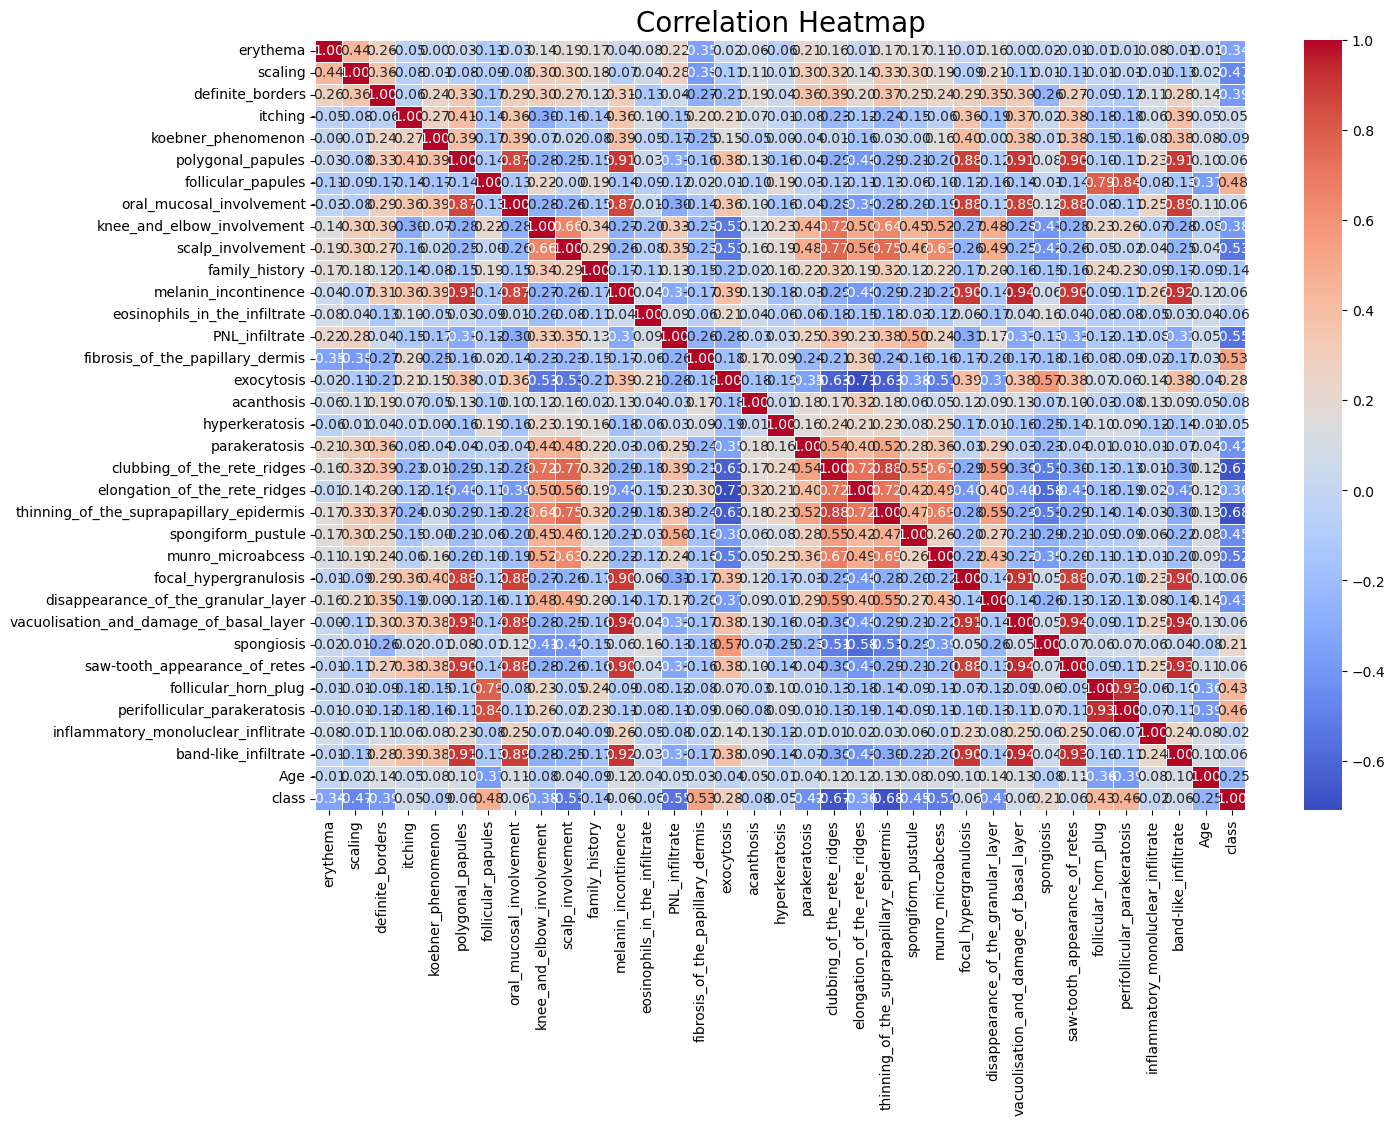

In [18]:
# Plot heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

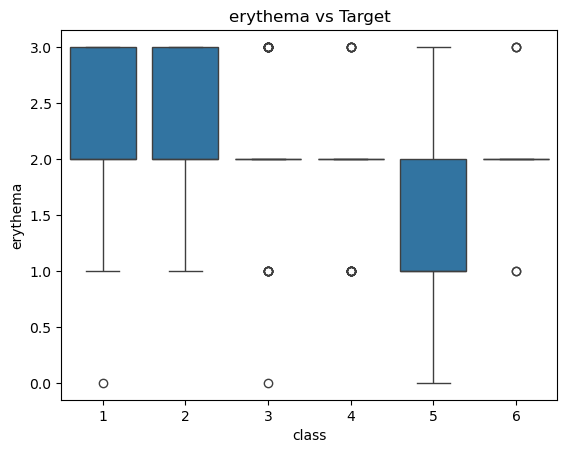

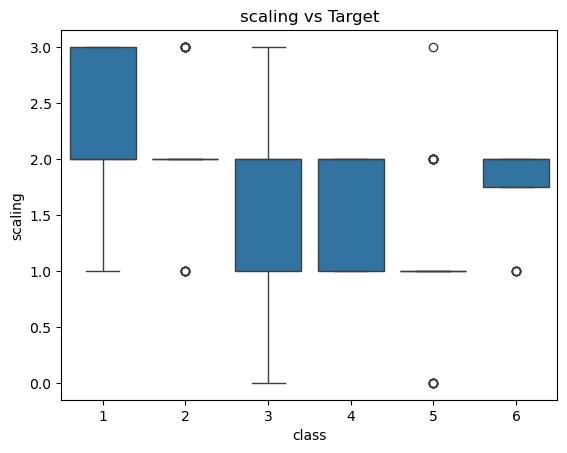

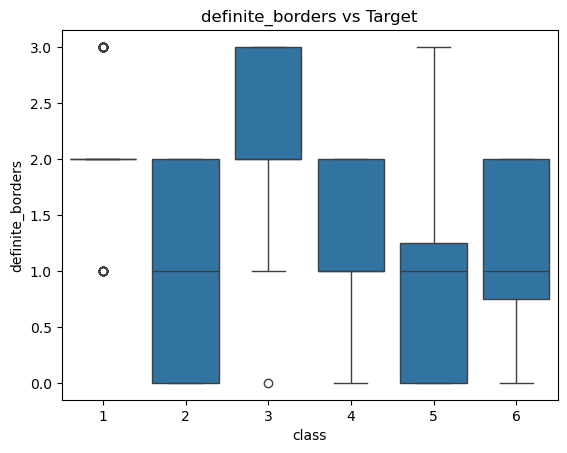

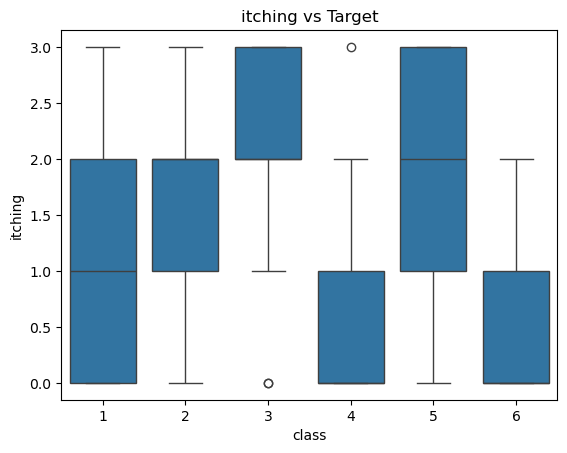

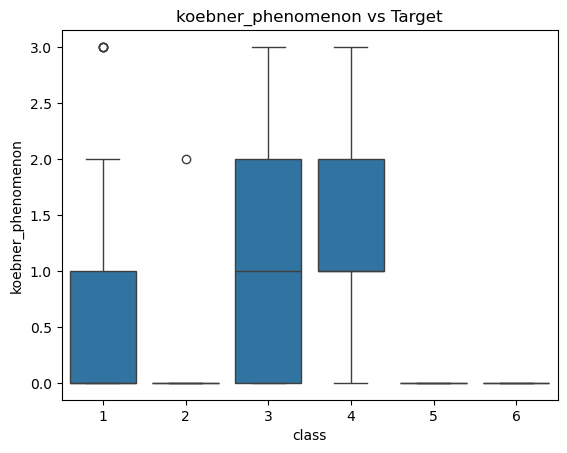

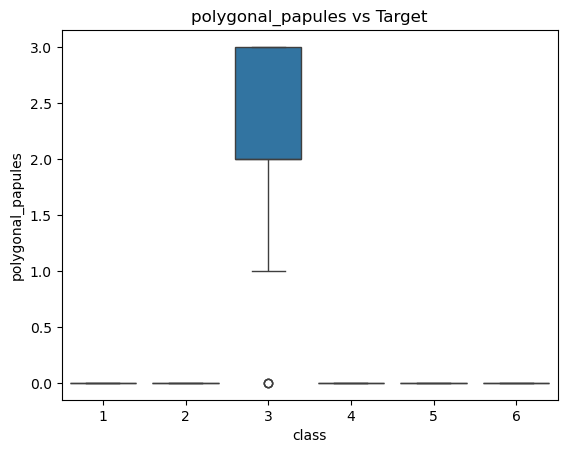

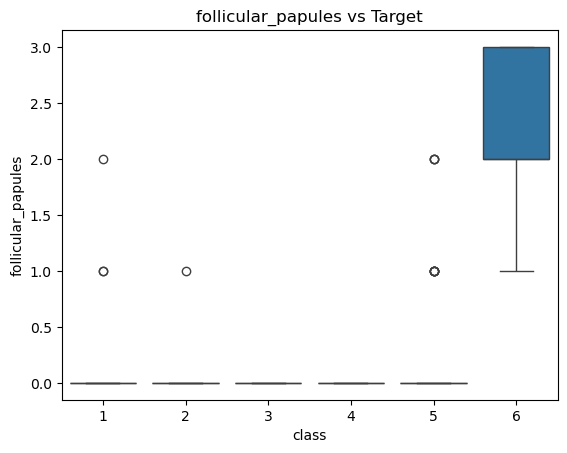

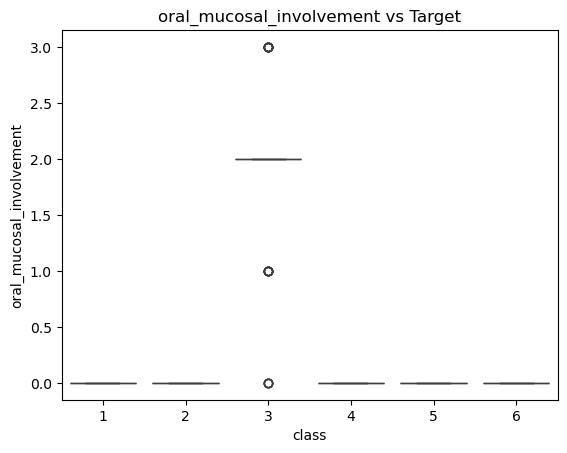

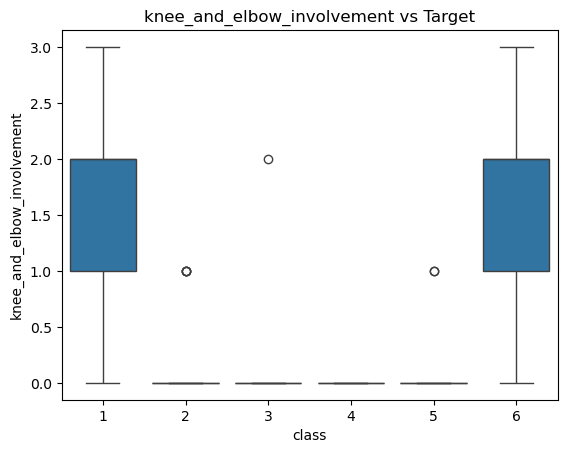

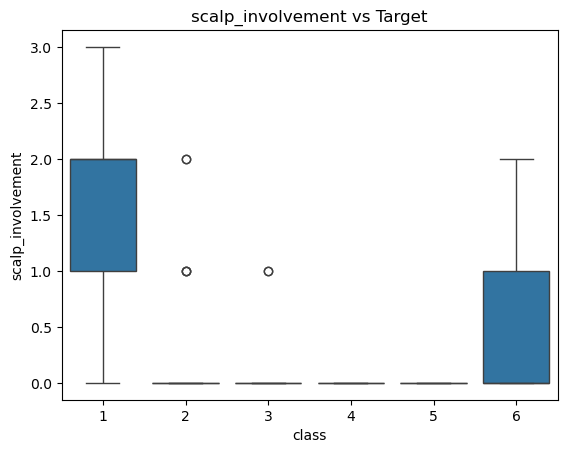

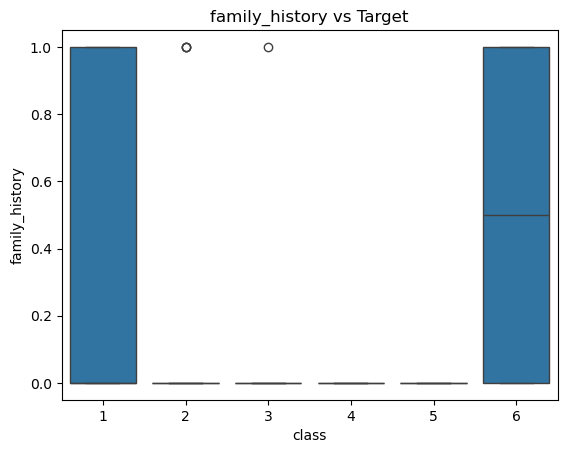

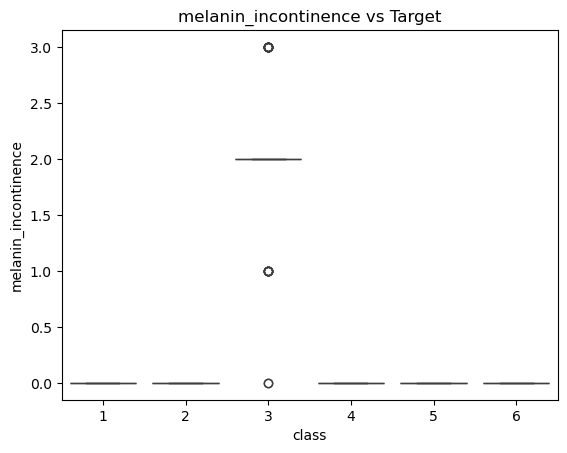

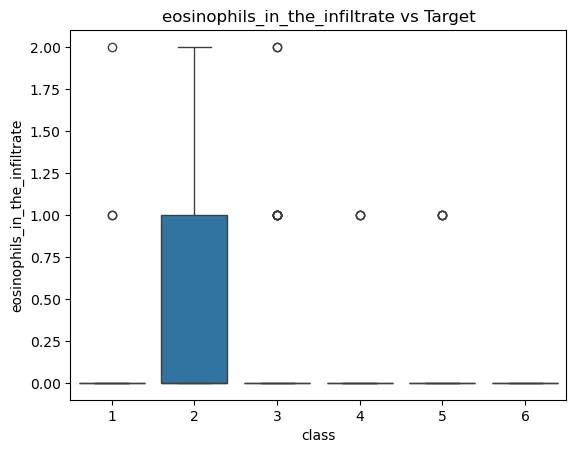

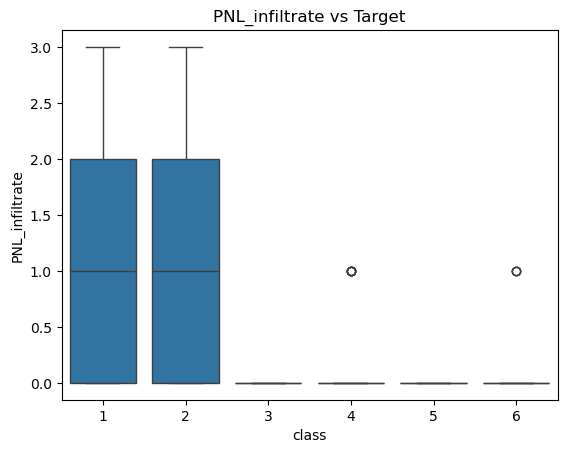

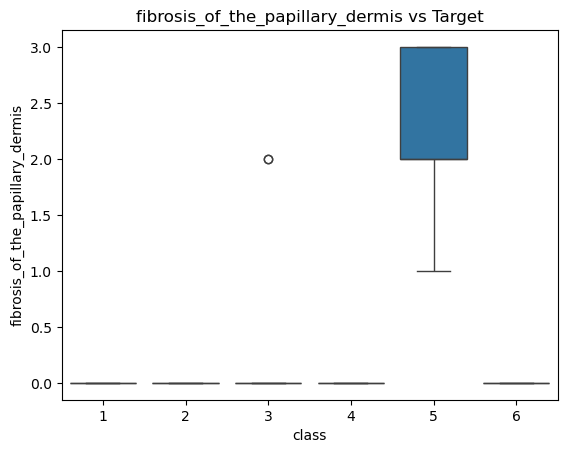

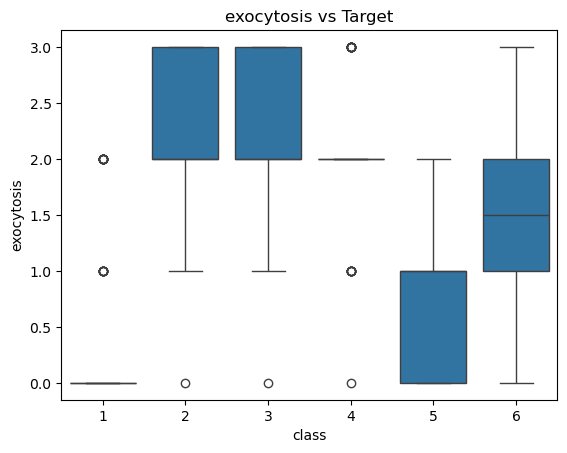

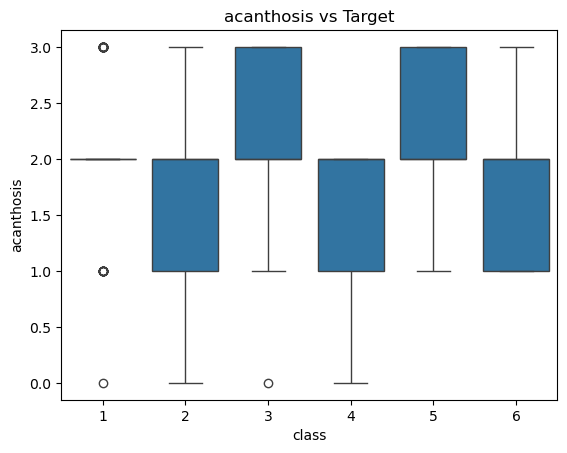

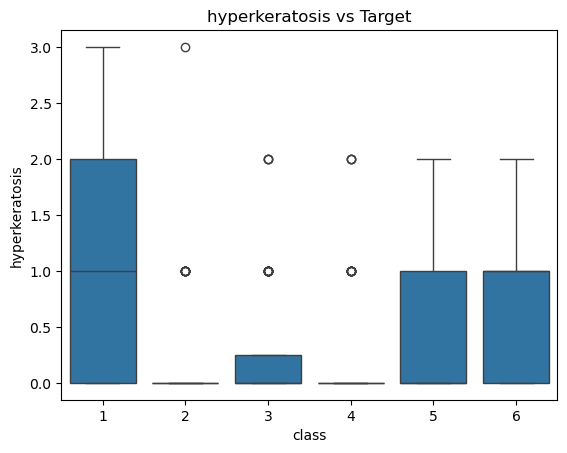

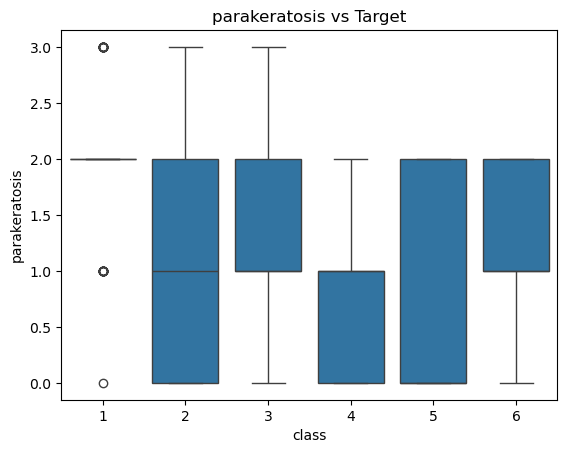

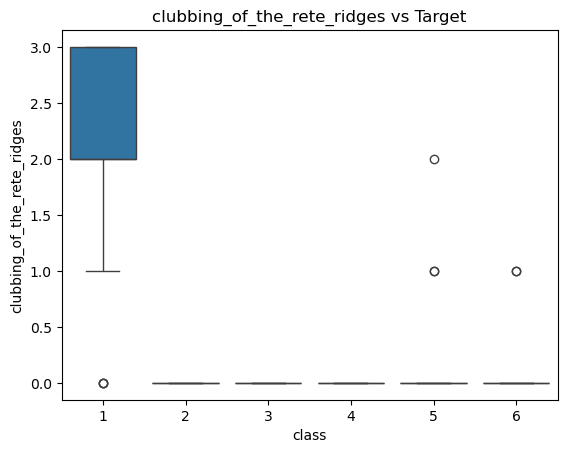

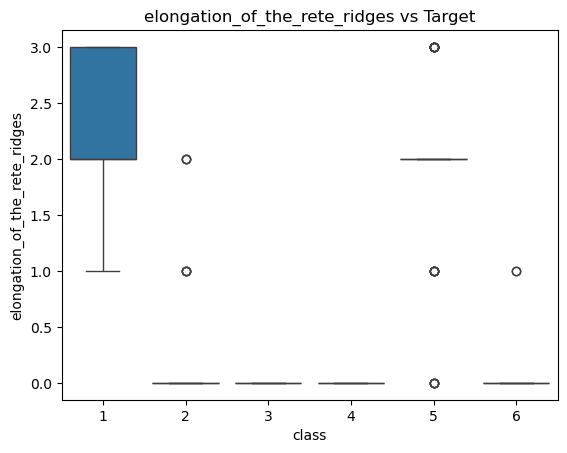

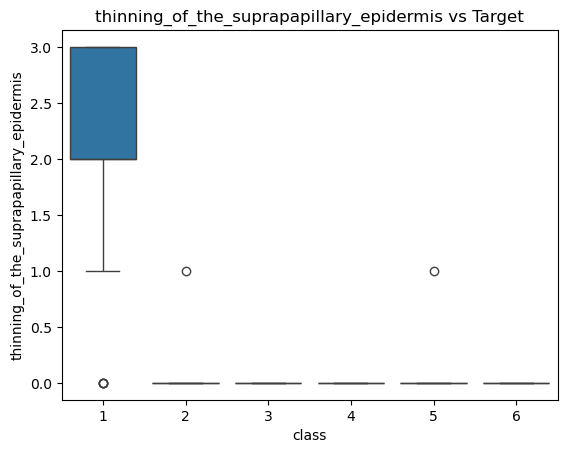

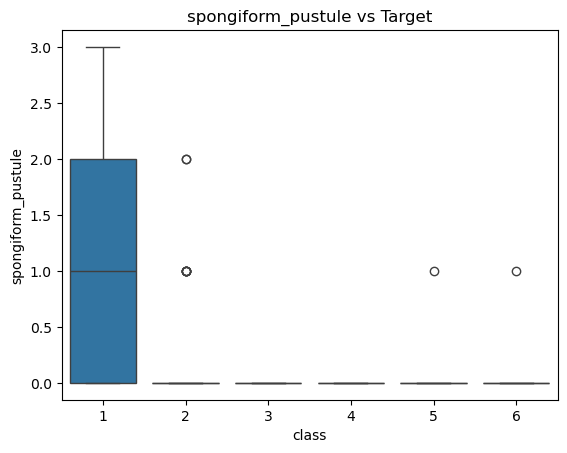

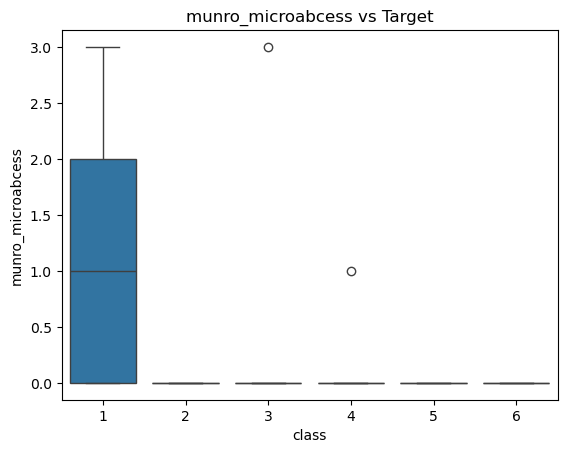

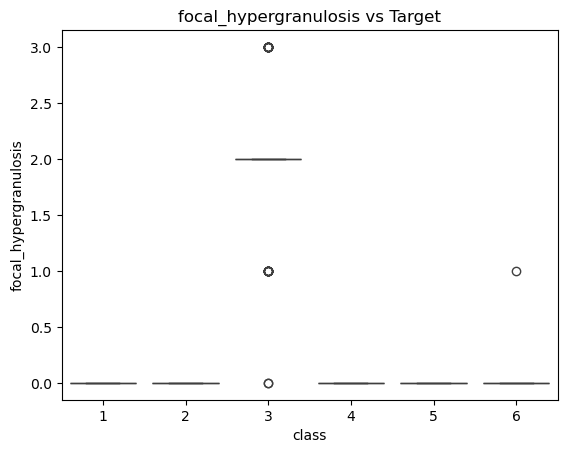

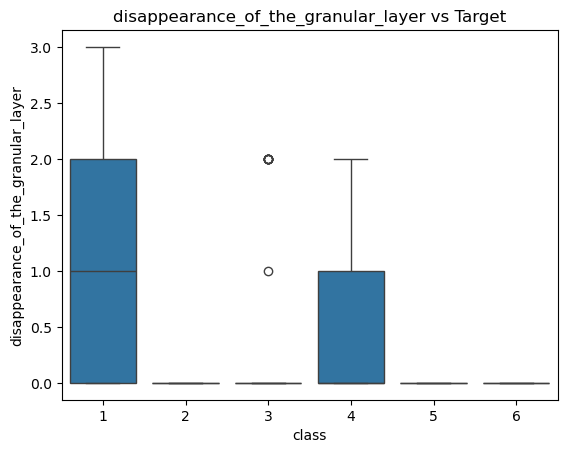

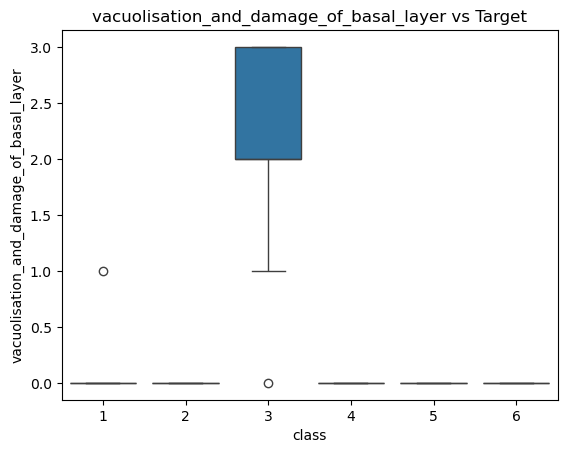

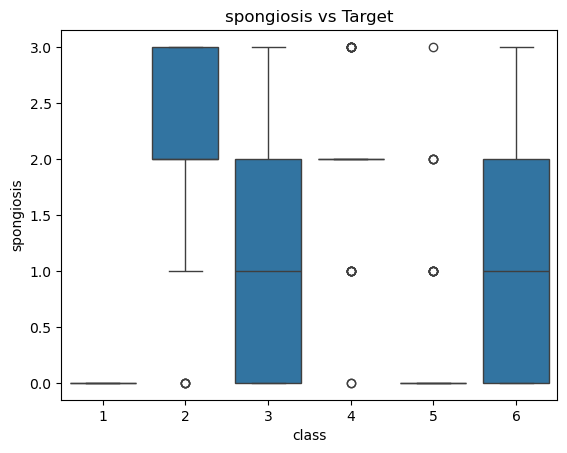

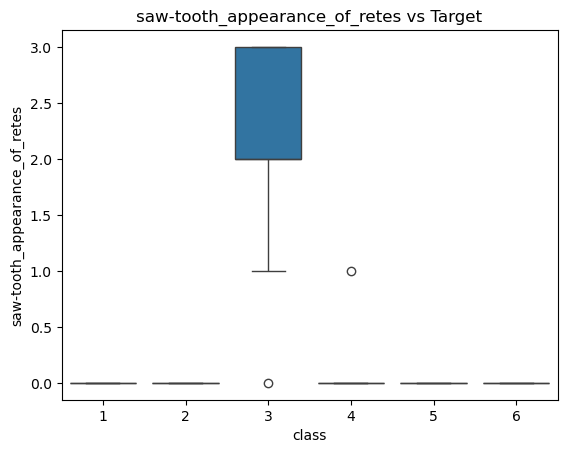

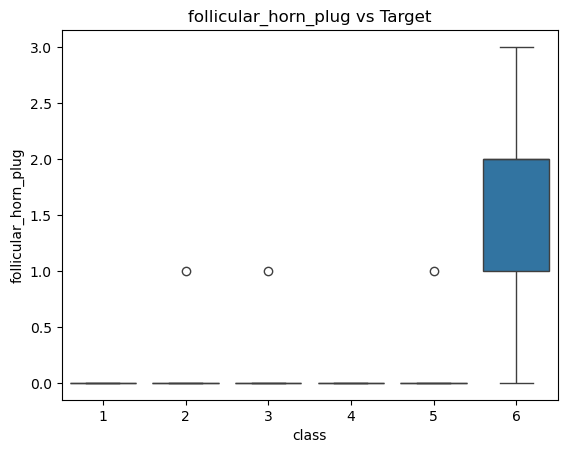

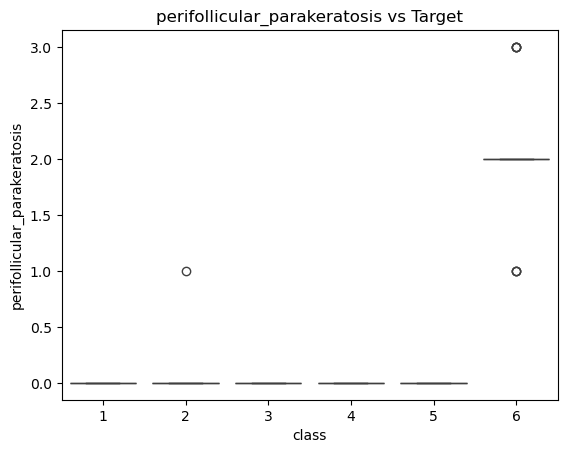

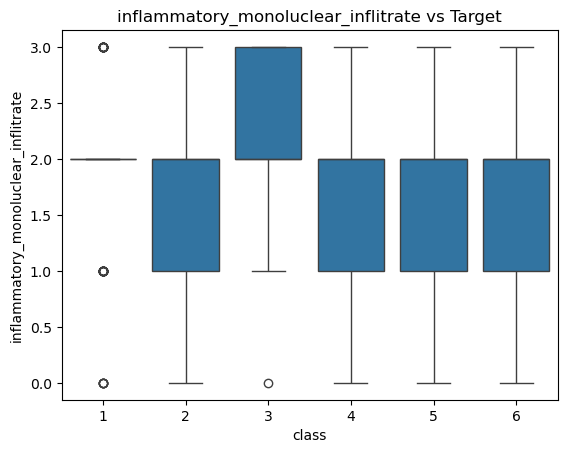

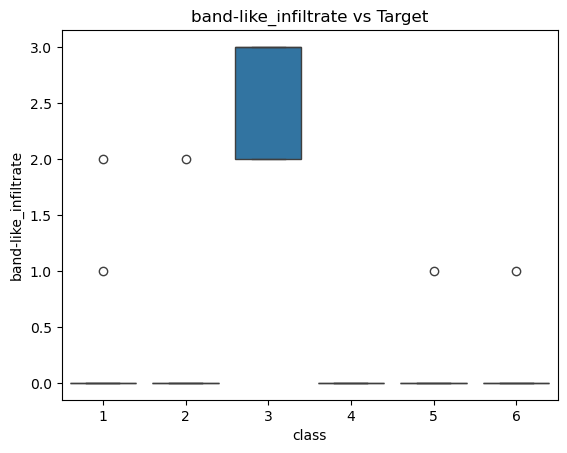

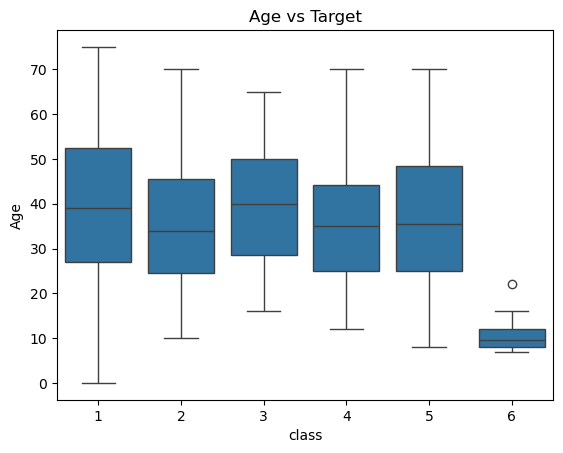

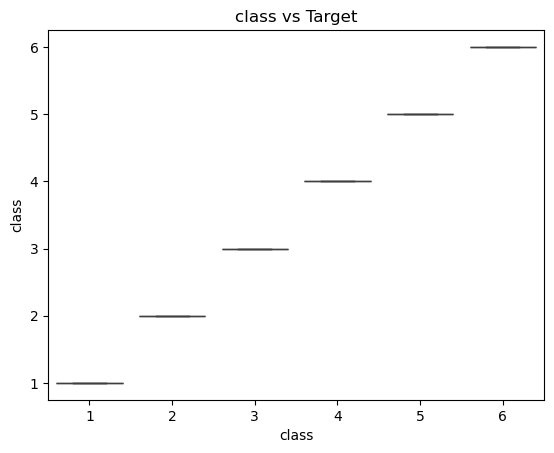

In [19]:
# Plot target vs each feature
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x = "class", y = column, data = df)
    plt.title(f"{column} vs Target")
    plt.show()

In [20]:
df.dropna(inplace=True)

# Data Preprocessing

In [21]:
#Missing Values
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [22]:
# Label Encoder
X = df.drop('class', axis=1)
y = df['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [23]:
#Smote
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Check the shape of the resampled data
print("Before SMOTE: ", X_train.shape, y_train.shape)
print("After SMOTE: ", X_resampled.shape, y_resampled.shape)

Before SMOTE:  (286, 34) (286,)
After SMOTE:  (534, 34) (534,)


## Feature Scaling

In [24]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data (X_resampled) and transform both train and test sets
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Fit and transform on the training data
X_test_scaled = scaler.transform(X_test)

# Model Training

In [25]:
# Decision Tree
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       1.00      0.67      0.80        12
           2       0.88      1.00      0.93        14
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00        10
           5       0.80      1.00      0.89         4

    accuracy                           0.92        72
   macro avg       0.91      0.93      0.91        72
weighted avg       0.93      0.92      0.91        72



In [26]:
# SVM
# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Model Performance:
Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        14
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         4

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



In [27]:
#KNN

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
print("\nKNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Model Performance:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.83      0.83      0.83        12
           2       1.00      1.00      1.00        14
           3       0.82      0.90      0.86        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         4

    accuracy                           0.94        72
   macro avg       0.94      0.95      0.94        72
weighted avg       0.95      0.94      0.95        72



In [28]:
# Random Forest Classifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        14
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         4

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



In [29]:
# Logistic Regression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         4

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [30]:
# XGBOOST

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_resampled_scaled, y_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       1.00      0.75      0.86        12
           2       0.88      1.00      0.93        14
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       0.80      1.00      0.89         4

    accuracy                           0.94        72
   macro avg       0.93      0.95      0.93        72
weighted avg       0.95      0.94      0.94        72



# Bar Plot for Model Comparison

In [31]:
model_results = {
    'Logistic Regression': 1.00,
    'Decision Tree': 0.916,
    'Random Forest': 0.986,
    'SVM': 0.986,
    'XGBoost': 0.94,
    'KNN': 0.94
}

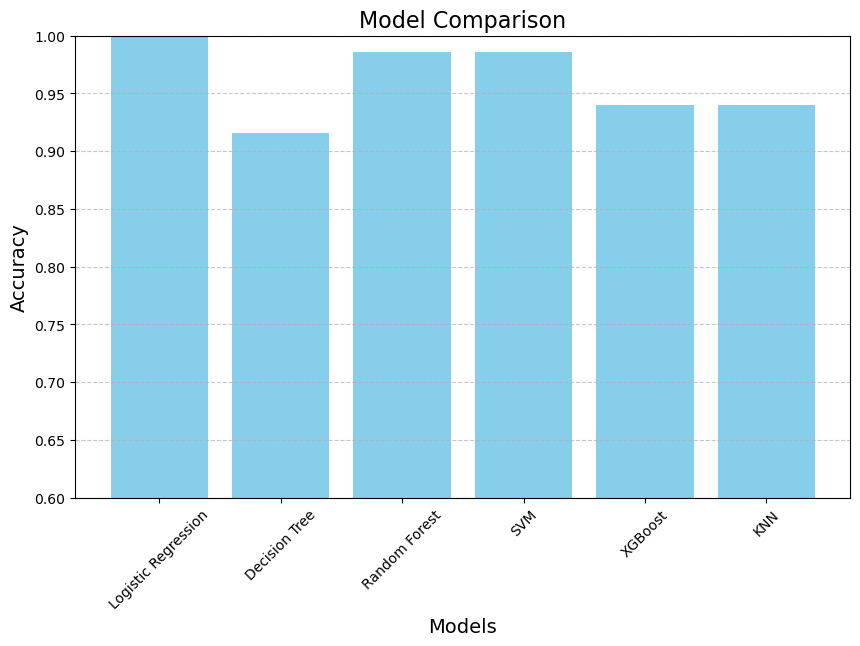

In [32]:
# Extract model names and scores
models = list(model_results.keys())
scores = list(model_results.values())

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='skyblue')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Comparison', fontsize=16)
plt.xticks(rotation=45)
plt.ylim([0.6, 1.0])  # Adjust according to your range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# HyperParameter Tunning

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_resampled_scaled, y_resampled)

print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_rf.best_score_)

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.9925233644859812


In [34]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_resampled_scaled, y_resampled)

print("Best Parameters for SVM:", grid_svm.best_params_)
print("Best Accuracy for SVM:", grid_svm.best_score_)

Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy for SVM: 0.977534826309293


In [35]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 
                        param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_resampled_scaled, y_resampled)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best Accuracy for XGBoost:", grid_xgb.best_score_)

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy for XGBoost: 0.9925233644859812


# Evaluate Model Robustness with Cross-Validation

In [36]:
from sklearn.model_selection import cross_val_score

models = {
    'Random Forest': grid_rf,
    'SVM': grid_svm,
    'XGBoost': grid_xgb
}

for name, model in models.items():
    scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')  # Use your evaluation metric
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

Random Forest: Mean Accuracy = 0.9776, Std = 0.0191
SVM: Mean Accuracy = 0.9637, Std = 0.0245
XGBoost: Mean Accuracy = 0.9637, Std = 0.0143
